# HW 11

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NBA Stats

* **Read in the file** 'nba-stats-2008-2017.csv' as a pandas dataframe called **`dfnba`**. This file from [Kaggle](https://www.kaggle.com/drgilermo/nba-players-stats) contains statistics for NBA players in the 2007-08 to 2016-17 seasons. An explanation of the column headings can be found at [basketball-reference.com](https://www.basketball-reference.com/about/glossary.html).

* There are two blank columns in the file. **Remove the blank columns** by calling 
```
dfnba.dropna(axis='columns', how='all', inplace=True)
```
<br>
* **Change the data type** of the `Year` column to `'category'`.

In [3]:
dfnba = pd.read_csv('nba-stats-2008-2017.csv')
dfnba.dropna(axis='columns', how='all', inplace=True)

In [4]:
dfnba.Year = dfnba.Year.astype('category')

Write a function called **`nba_leader_by_year(df, cat, maxmin)`** that returns the names of the players who were at the top (or bottom) of a category in each year. The arguments are
* `df` is a dataframe (`dfnba` or a subset of it).
* `cat` is one of the column headings of `dfnba`.
* `maxmin` is an optional argument that equals `'max'` or `'min'`, corresponding to the top or bottom of the category, respectively. By default the argument equals `'max'`. 

Consider only players who played **at least 40 games in a year**. The return value is **a list of 3-element tuples `(year, value, players)`** corresponding to
* each `year` in 2008-2017
* the max or min category `value`
* a sorted list of `players` who attained the max or min value. 

Examples: (The category values need not appear exactly as shown below.)
* `nba_leader_by_year(dfnba, 'TOV')` returns the players who made the most turnovers in each year.
```
[(2008, 295, ['Steve Nash']),
 (2009, 274, ['Russell Westbrook']),
 (2010, 295, ['Steve Nash']),
 (2011, 316, ['Russell Westbrook']),
 (2012, 255, ['John Wall']),
 (2013, 295, ['James Harden']),
 (2014, 295, ['John Wall']),
 (2015, 321, ['James Harden']),
 (2016, 374, ['James Harden']),
 (2017, 464, ['James Harden'])]
 ```
 <br>
* `nba_leader_by_year(dfnba[dfnba.Tm == 'DEN'], 'Age', 'min')` returns the youngest Denver Nuggets in each year.
```
[(2008, 22, ['J.R. Smith']),
 (2009, 23, ['J.R. Smith']),
 (2010, 22, ['Ty Lawson']),
 (2011, 23, ['Ty Lawson']),
 (2012, 22, ['Kenneth Faried', 'Kosta Koufos']),
 (2013, 22, ['Jordan Hamilton']),
 (2014, 21, ['Evan Fournier', 'Quincy Miller']),
 (2015, 20, ['Gary Harris', 'Jusuf Nurkic']),
 (2016, 19, ['Emmanuel Mudiay']),
 (2017, 19, ['Jamal Murray'])]
```

In [5]:
def nba_leader_by_year(df, cat, maxmin = 'max'):
    df = df[df.G >= 40]
    
    lst = []
    for yr in range(2008, 2018):
        newdf = df[df.Year == yr]
        if maxmin == 'max':
            newdf2 = newdf[newdf[cat] == newdf[cat].max()]
        else:
            newdf2 = newdf[newdf[cat] == newdf[cat].min()]
        tup = (newdf2.Year.values[0], newdf2[cat].values[0], newdf2.Player.tolist())
        lst.append(tup)
    
    return lst    

In [6]:
nba_leader_by_year(dfnba, 'TOV')

[(2008, 295, ['Steve Nash']),
 (2009, 274, ['Russell Westbrook']),
 (2010, 295, ['Steve Nash']),
 (2011, 316, ['Russell Westbrook']),
 (2012, 255, ['John Wall']),
 (2013, 295, ['James Harden']),
 (2014, 295, ['John Wall']),
 (2015, 321, ['James Harden']),
 (2016, 374, ['James Harden']),
 (2017, 464, ['James Harden'])]

In [7]:
nba_leader_by_year(dfnba[dfnba.Tm == 'DEN'], 'Age', 'min')

[(2008, 22, ['J.R. Smith']),
 (2009, 23, ['J.R. Smith']),
 (2010, 22, ['Ty Lawson']),
 (2011, 23, ['Ty Lawson']),
 (2012, 22, ['Kenneth Faried', 'Kosta Koufos']),
 (2013, 22, ['Jordan Hamilton']),
 (2014, 21, ['Evan Fournier', 'Quincy Miller']),
 (2015, 20, ['Gary Harris', 'Jusuf Nurkic']),
 (2016, 19, ['Emmanuel Mudiay']),
 (2017, 19, ['Jamal Murray'])]

### Which division is better: West or East?

* First **remove** from `dfnba` the players who played for more than one team in a single year. Their `Tm` is listed as `TOT`. (*Hint:* After removing, if you wish to access the row index numbers, call `dfnba.reset_index(inplace=True)` to renumber the rows.)
* Next **add a column** `DIV` that indicates whether each team is `'West'` or `'East'`. The Western division teams are
```
['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHX', 'POR', 'SAC', 'SAS', 'UTA']
```
The rest are Eastern division teams. (Note: A few teams have changed names over the years. Old team names have been replaced by the current name.)

* Write a function **`east_west_top_team(df, cat, maxmin)`** that identifies the team in each division (East and West) that had the most (or least) total sum in a category. The function returns a list of two two-element tuples `(team, cat_sum)`, corresponding to the East and West results, respectively, where
  * `team` is the team name in the division that had the max or min category sum. (If more than one team matches, return any of the names.)
  * `cat_sum` equals the max (or min) category sum.

Examples:<br>
`east_west_top_team(dfnba, '3P')` returns 
```
[('NYK', 6862), ('HOU', 7643)]
```

`east_west_top_team(dfnba[dfnba.Year == 2017], 'PTS', False)` returns
```
[('ORL', 8288), ('DAL', 8029)]
```

In [8]:
def get_div(team):
    west_list = ['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHX', 'POR', 'SAC', 'SAS', 'UTA']
    if team in west_list:
        return 'West'
    else:
        return 'East'

In [9]:
dfnba = dfnba[dfnba.Tm != 'TOT']
dfnba.reset_index(inplace = True)
dfnba['DIV'] = dfnba.Tm.apply(get_div)
# del dfnba['level_0']

In [10]:
def east_west_top_team(df, cat, maxmin = True):
    divlist = ['East', 'West']

    lst = []
    for div in divlist:
        newdf = df[df.DIV == div].set_index('Tm')
        series = newdf.groupby('Tm')[cat].sum()
        if maxmin:
            team = series.idxmax()
            cat_sum = series.max()
        else:
            team = series.idxmin()
            cat_sum = series.min()
        lst.append((team, cat_sum))
            
    return lst

In [11]:
east_west_top_team(dfnba, '3P')

[('NYK', 6862), ('HOU', 7643)]

In [12]:
east_west_top_team(dfnba[dfnba.Year == 2017], 'PTS', False)

[('ORL', 8288), ('DAL', 8029)]

* Write a function **`east_west_top_players(df, cat)`** that returns a list containing two sublists (one for each division) of the top player in a given category for each year in `df`. (If more than one player matches, return any of the top player names.) Consider only players who played at least 40 games in a year.

Examples:<br>
`east_west_top_players(dfnba, 'PTS')` returns
```
[[('LeBron James', 2250),
  ('Dwyane Wade', 2386),
  ('LeBron James', 2258),
  ('LeBron James', 2111),
  ('LeBron James', 1683),
  ('LeBron James', 2036),
  ('Carmelo Anthony', 2112),
  ('LeBron James', 1743),
  ('LeBron James', 1920),
  ('Isaiah Thomas', 2199)],
 [('Kobe Bryant', 2323),
  ('Kobe Bryant', 2201),
  ('Kevin Durant', 2472),
  ('Kevin Durant', 2161),
  ('Kevin Durant', 1850),
  ('Kevin Durant', 2280),
  ('Kevin Durant', 2593),
  ('James Harden', 2217),
  ('James Harden', 2376),
  ('Russell Westbrook', 2558)]]
```

`east_west_top_players(dfnba[dfnba.Year == 2016], '3P')` returns
```
[[('Kyle Lowry', 212)], [('Stephen Curry', 402)]]
```

In [13]:
def east_west_top_players(df, cat):
    divs = ['East', 'West']
    
    years = df.Year.values.unique()
    first_year = years[0]
    last_year = years[-1]
    year_difference = last_year - first_year
    
    lst = []
    for div in divs:
        divlist = []
        for yr in range(first_year, (first_year + year_difference + 1)):
            newdf = df[(df.DIV == div) & (df.G >= 40) & (df.Year == yr)]
            series = newdf.groupby('Player')[cat].sum()
            player = series.idxmax()
            value = series.max()
            divlist.append((player, value))
        lst.append(divlist)
    
    return lst

In [14]:
east_west_top_players(dfnba, 'PTS')

[[('LeBron James', 2250),
  ('Dwyane Wade', 2386),
  ('LeBron James', 2258),
  ('LeBron James', 2111),
  ('LeBron James', 1683),
  ('LeBron James', 2036),
  ('Carmelo Anthony', 2112),
  ('LeBron James', 1743),
  ('LeBron James', 1920),
  ('Isaiah Thomas', 2199)],
 [('Kobe Bryant', 2323),
  ('Kobe Bryant', 2201),
  ('Kevin Durant', 2472),
  ('Kevin Durant', 2161),
  ('Kevin Durant', 1850),
  ('Kevin Durant', 2280),
  ('Kevin Durant', 2593),
  ('James Harden', 2217),
  ('James Harden', 2376),
  ('Russell Westbrook', 2558)]]

In [15]:
east_west_top_players(dfnba[dfnba.Year == 2016], '3P')

[[('Kyle Lowry', 212)], [('Stephen Curry', 402)]]

Write a function **`east_west_top_players_plot(df, cat)`** that calls `east_west_top_players()` for a given category and plots the results, including the player names. 

In [66]:
def east_west_top_players_plot(df, cat):
    east_west_lists = east_west_top_players(df, cat)
    yrlist = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

    east = east_west_lists[0]
    west = east_west_lists[1]

    east_vals = []
    east_players = []
    for tup in east:
        east_vals.append(tup[1])
        east_players.append(tup[0])

    west_vals = []
    west_players = []
    for tup in west:
        west_vals.append(tup[1])
        west_players.append(tup[0])


    plt.figure(figsize = (14,7))

    plt.plot(yrlist, east_vals, label = 'East')
    plt.plot(yrlist, west_vals, label = 'West')

    plt.plot(yrlist, east_vals, 'o', c = 'k')
    plt.plot(yrlist, west_vals, 'o', c = 'k')

    count = 0
    for player in east_players:
        plt.text(yrlist[count], east_vals[count], player)
        count += 1

    count2 = 0
    for player in west_players:
        plt.text(yrlist[count2], west_vals[count2], player)
        count2 += 1

    plt.legend()
    title = 'East vs West ' + cat + ' Comparison'
    plt.title(title)

    plt.show()

Call `east_west_top_players_plot(dfnba, 'PTS')`. The result should look similar to the following plot. It need not exactly match in appearance.

<img src="http://www.coloradomath.org/python/east-west-pts.png" />

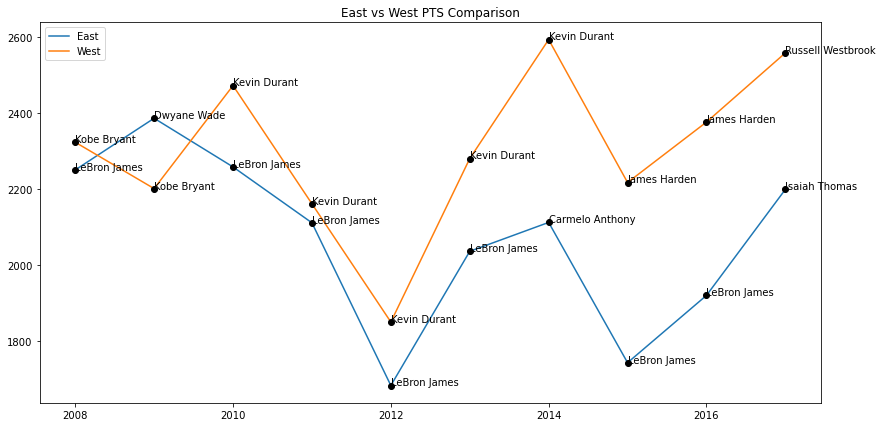

In [67]:
east_west_top_players_plot(dfnba, 'PTS')

Call `east_west_top_players_plot(dfnba, 'BLK')`.

<img src="http://www.coloradomath.org/python/east-west-blk.png" />

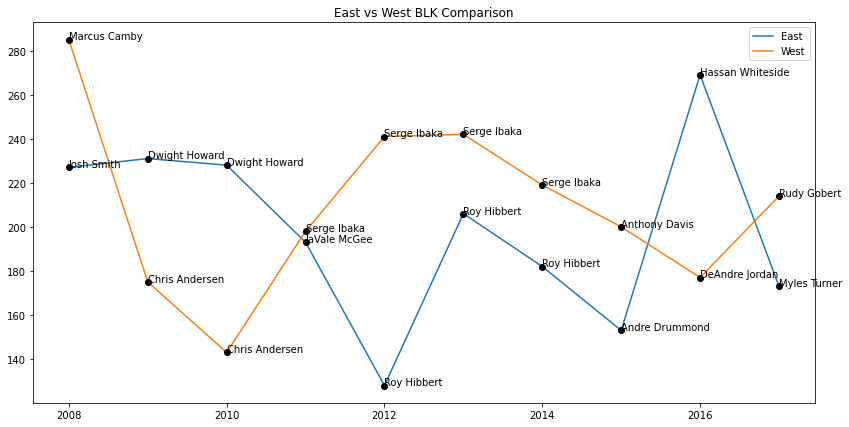

In [68]:
east_west_top_players_plot(dfnba, 'BLK')